In [2]:
import pandas as pd
import matplotlib
import sys
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('diabetes.csv')

In [3]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=31)

In [6]:
from sklearn.metrics import f1_score

In [24]:
from sklearn.linear_model import LogisticRegression
import warnings warnings.filterwarnings("ignore")

lr = LogisticRegression(random_state=0, solver='liblinear')
lr = lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
f1 = f1_score(Y_test, y_pred, average='micro')
print(f1)

0.7760416666666666


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

cm = confusion_matrix(Y_test, y_pred)

cm

array([[107,  18],
       [ 28,  39]], dtype=int64)

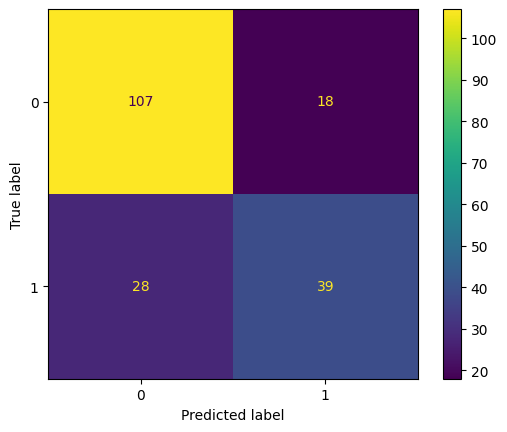

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [10]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.86      0.82       125
   with diabetes       0.68      0.58      0.63        67

        accuracy                           0.76       192
       macro avg       0.74      0.72      0.73       192
    weighted avg       0.75      0.76      0.76       192



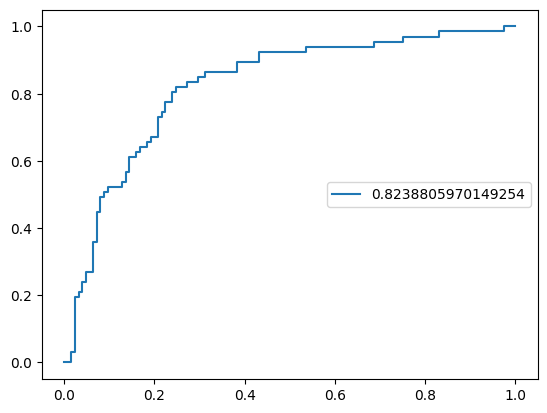

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label=str(auc))
plt.legend(loc=5)
plt.show()

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
import warnings warnings.filterwarnings("ignore")

cls = LogisticRegression(random_state=0)
param_grid_lr = {
        'penalty': ('l1', 'l2', 'elasticnet'),
        'solver': ('saga', 'sag', 'liblinear', 'newton-cg', 'newton-cholesky'),
        'class_weight': ['balanced'],
        'multi_class': ('ovr', 'multinomial'),
        'C': (0.1, 0.15,0.25,0.35, 0.45, 0.55,0.65,0.75, 0.9,1.0,1.5,2.0),
    }

search = GridSearchCV(cls, param_grid_lr, scoring='f1_micro')
search.fit(X, Y)

best_lr = search.best_estimator_

In [26]:
print(search.best_score_)
print(search.best_params_)

0.7618453441982853
{'C': 0.9, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
%%time
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()
parameters = {'min_samples_split': range(2,40), 'max_depth': range(1,10), 'criterion': ["gini", "entropy", "log_loss"], 'min_samples_leaf': range(1,10) }

search = GridSearchCV(cls, parameters, scoring='f1_micro')
search.fit(X, Y)

best_tree = search.best_estimator_

CPU times: total: 5min
Wall time: 18min 26s


In [30]:
print(search.best_score_)
print(search.best_params_)

0.7526865291571173
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 14}


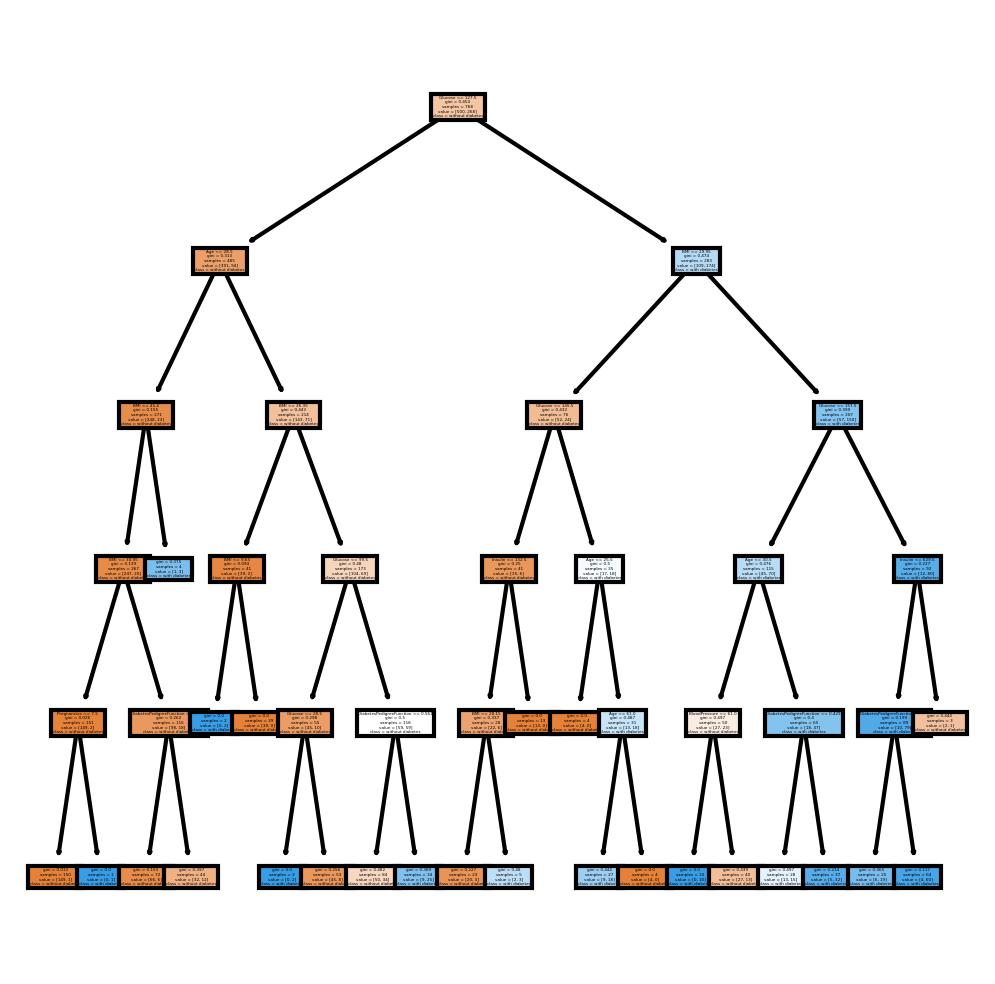

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree
cn=  ['without diabetes', 'with diabetes']
fn =  ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(best_tree,
           feature_names = fn, 
           class_names=cn,
           filled = True);